<a href="https://colab.research.google.com/github/Kowsalyasriganesh/NAIVE_BAYES/blob/main/NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("card_transdata.csv")

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df1= df.head(10000)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   fraud                           10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [ ]:
df1.shape

(10000, 8)

In [ ]:
df1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.374744,4.807107,1.824164,0.879000,0.350800,0.104800,0.641500,0.084100
std,58.811106,22.260124,2.762438,0.326144,0.477244,0.306311,0.479584,0.277552
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.808606,0.305219,0.489052,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.026888,1.006459,1.005754,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.866217,3.313696,2.091252,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0
9999,1.292596,0.415847,1.332285,0.0,1.0,0.0,1.0,0.0


In [ ]:
df1.nunique()

distance_from_home                10000
distance_from_last_transaction    10000
ratio_to_median_purchase_price    10000
repeat_retailer                       2
used_chip                             2
used_pin_number                       2
online_order                          2
fraud                                 2
dtype: int64

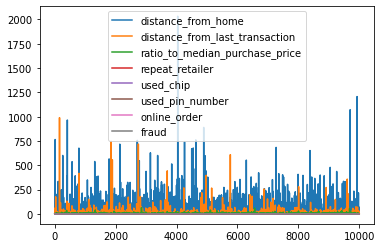

In [ ]:
df1.plot()

In [ ]:
df1.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

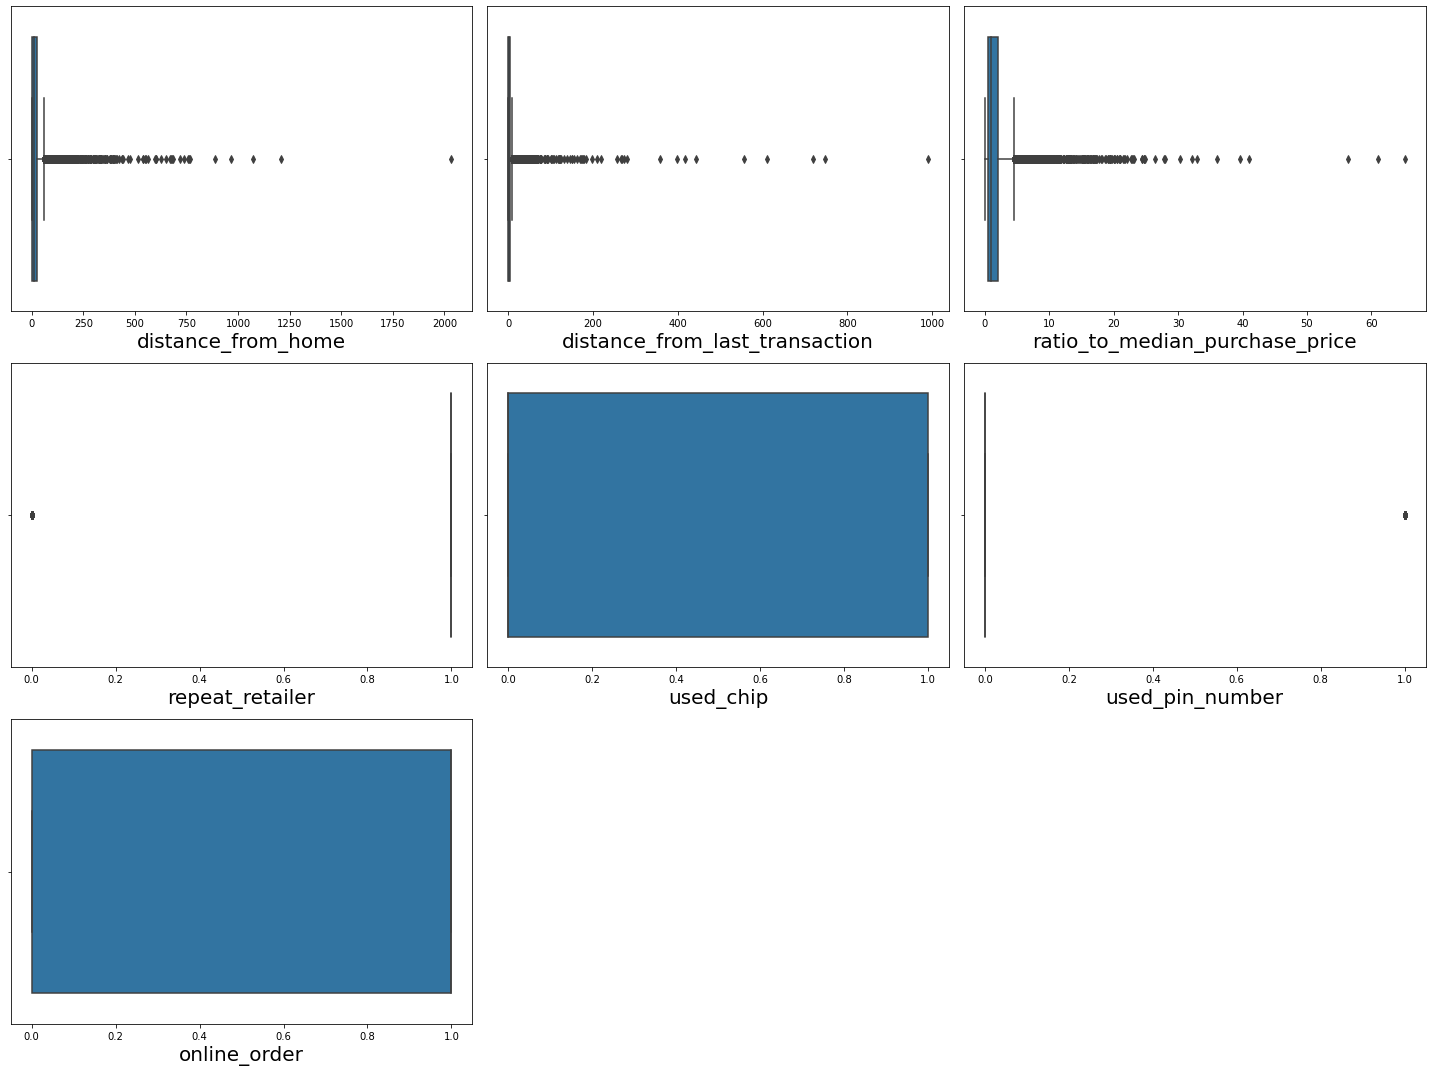

In [ ]:
x = df1.drop('fraud', axis= 1)
y = df1['fraud']
plt.figure(figsize = (20,15))
plotnumber = 1
for col in x.columns:
    if plotnumber <= 7:
        ax = plt.subplot (3, 3, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 20)
    plotnumber += 1
plt.tight_layout()
plt.show()

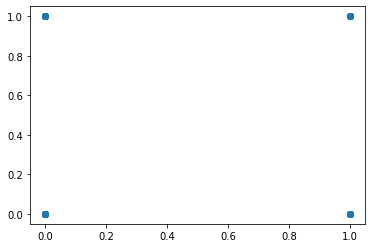

In [ ]:
plt.scatter(df1.online_order,df1.used_chip)
plt.show()

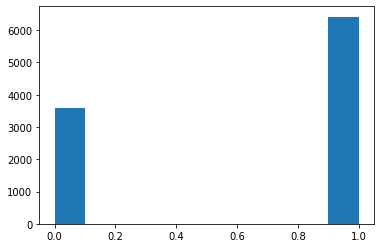

In [ ]:
plt.hist(df1.online_order)
plt.show()

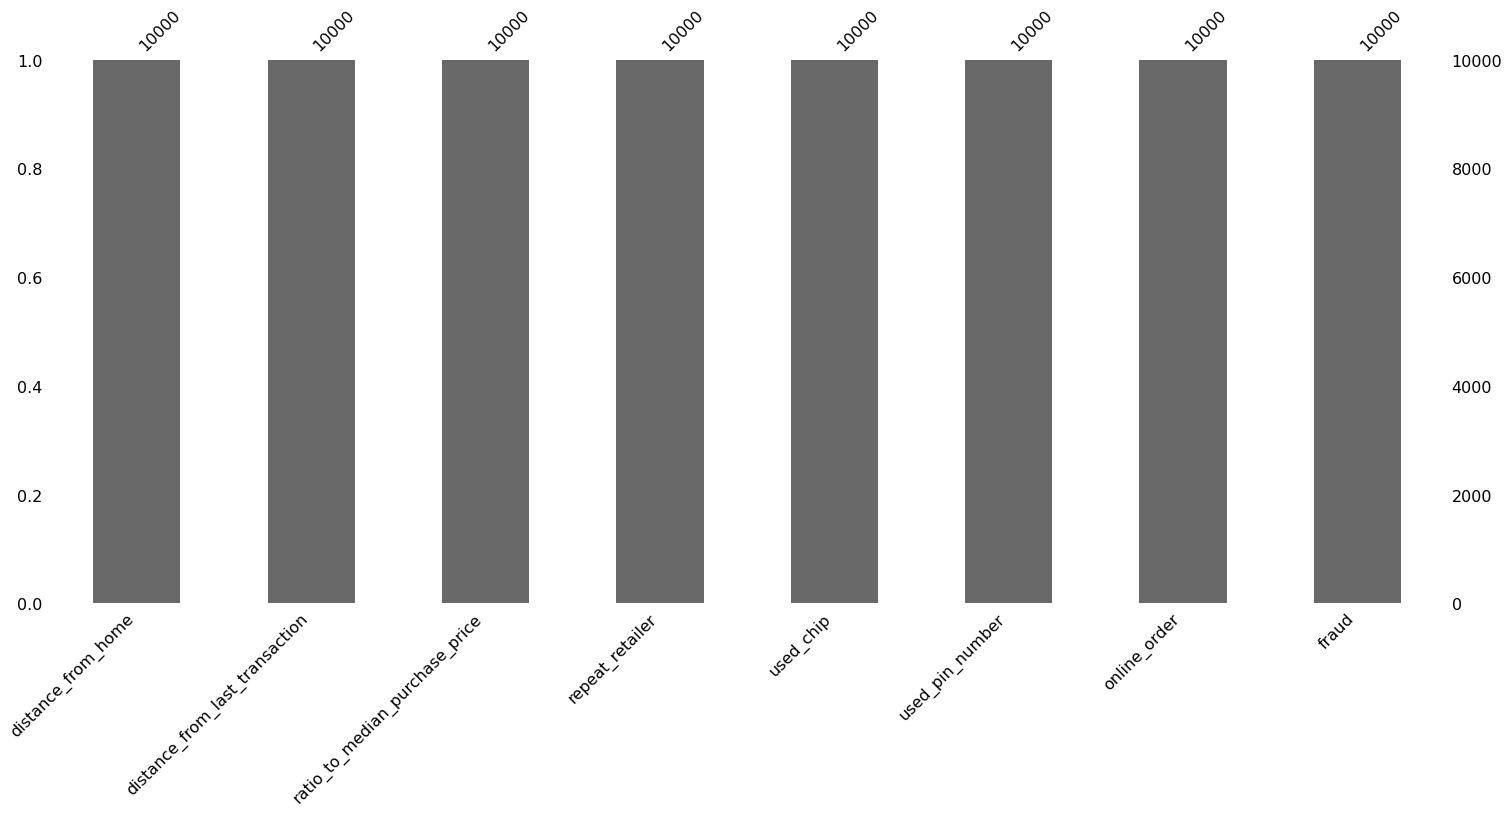

In [ ]:
import missingno as mn
mn.bar(df1)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[920,   1],
       [  0,  79]])

In [ ]:
import sklearn

In [ ]:
accuracy_score(y_test, y_pred)

0.999

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.999

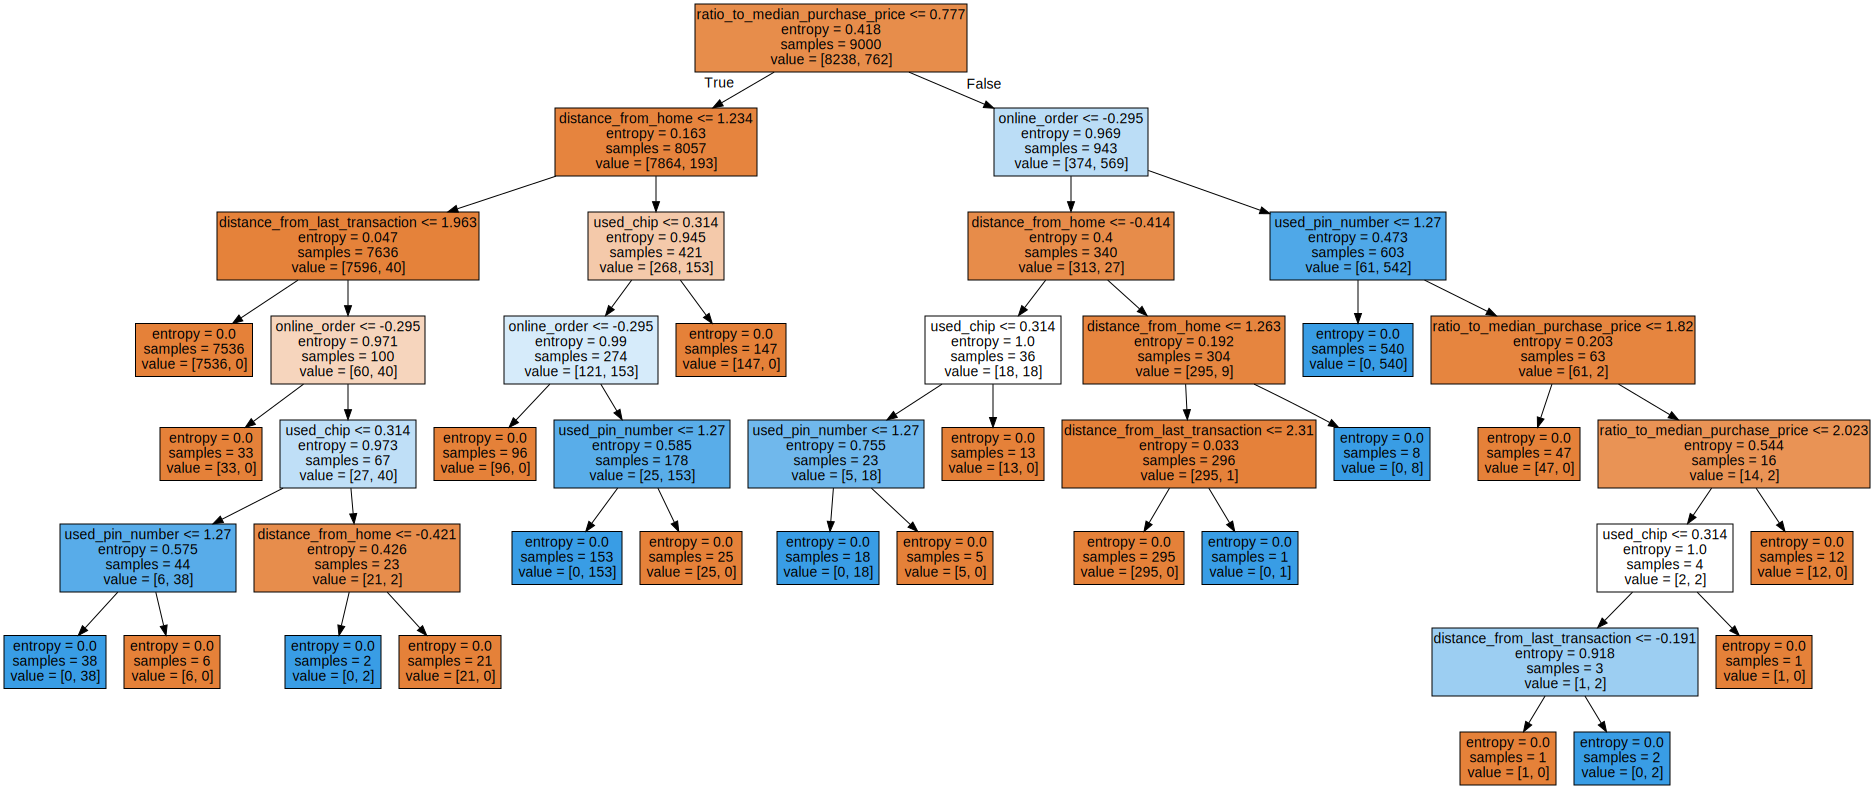

In [ ]:
graphviz.Source(export_graphviz (clf,feature_names= x.columns, filled = True))

In [ ]:
clf1 = GaussianNB()
clf1.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[911,  10],
       [ 38,  41]])

In [ ]:
accuracy_score(y_test, y_pred)

0.952